C=1.00
Sparsity with L1 penalty:                7.81%
Sparsity with Elastic-Net penalty:       6.25%
Sparsity with L2 penalty:                6.25%
Score with L1 penalty:                   0.90
Score with Elastic-Net penalty:          0.90
Score with L2 penalty:                   0.90
C=0.10
Sparsity with L1 penalty:                40.62%
Sparsity with Elastic-Net penalty:       20.31%
Sparsity with L2 penalty:                6.25%
Score with L1 penalty:                   0.89
Score with Elastic-Net penalty:          0.89
Score with L2 penalty:                   0.90
C=0.01
Sparsity with L1 penalty:                87.50%
Sparsity with Elastic-Net penalty:       76.56%
Sparsity with L2 penalty:                6.25%
Score with L1 penalty:                   0.74
Score with Elastic-Net penalty:          0.86
Score with L2 penalty:                   0.89


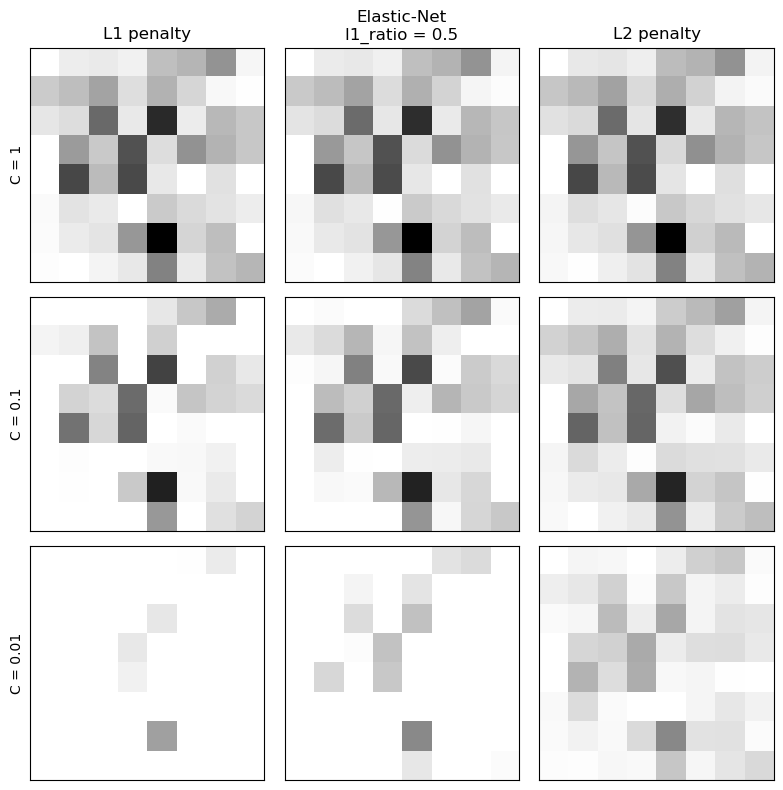

In [9]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = datasets.load_digits(return_X_y=True)

# classify small against large digits
y = (y > 4).astype(int)

# split like the example (important for matching scores)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, stratify=y, random_state=42
)

# scale using ONLY train stats (important)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

l1_ratio = 0.5  # L1 weight in the Elastic-Net regularization

fig, axes = plt.subplots(3, 3, figsize=(8, 8))

for i, (C, axes_row) in enumerate(zip((1, 0.1, 0.01), axes)):
    # IMPORTANT: set penalty correctly
    clf_l1_LR = LogisticRegression(
        C=C, penalty="l1", solver="saga", tol=0.01, max_iter=1000, random_state=42
    )
    clf_en_LR = LogisticRegression(
        C=C, penalty="elasticnet", l1_ratio=l1_ratio, solver="saga",
        tol=0.01, max_iter=1000, random_state=42
    )
    clf_l2_LR = LogisticRegression(
        C=C, penalty="l2", solver="saga", tol=0.01, max_iter=1000, random_state=42
    )

    clf_l1_LR.fit(X_train, y_train)
    clf_en_LR.fit(X_train, y_train)
    clf_l2_LR.fit(X_train, y_train)

    coef_l1_LR = clf_l1_LR.coef_.ravel()
    coef_en_LR = clf_en_LR.coef_.ravel()
    coef_l2_LR = clf_l2_LR.coef_.ravel()

    sparsity_l1_LR = np.mean(coef_l1_LR == 0) * 100
    sparsity_en_LR = np.mean(coef_en_LR == 0) * 100
    sparsity_l2_LR = np.mean(coef_l2_LR == 0) * 100

    print(f"C={C:.2f}")
    print(f"{'Sparsity with L1 penalty:':<40} {sparsity_l1_LR:.2f}%")
    print(f"{'Sparsity with Elastic-Net penalty:':<40} {sparsity_en_LR:.2f}%")
    print(f"{'Sparsity with L2 penalty:':<40} {sparsity_l2_LR:.2f}%")
    print(f"{'Score with L1 penalty:':<40} {clf_l1_LR.score(X_test, y_test):.2f}")
    print(f"{'Score with Elastic-Net penalty:':<40} {clf_en_LR.score(X_test, y_test):.2f}")
    print(f"{'Score with L2 penalty:':<40} {clf_l2_LR.score(X_test, y_test):.2f}")

    if i == 0:
        axes_row[0].set_title("L1 penalty")
        axes_row[1].set_title(f"Elastic-Net\nl1_ratio = {l1_ratio}")
        axes_row[2].set_title("L2 penalty")

    for ax, coefs in zip(axes_row, [coef_l1_LR, coef_en_LR, coef_l2_LR]):
        ax.imshow(
            np.abs(coefs.reshape(8, 8)),
            interpolation="nearest",
            cmap="binary",
            vmax=1,
            vmin=0,
        )
        ax.set_xticks(())
        ax.set_yticks(())

    axes_row[0].set_ylabel(f"C = {C}")

plt.tight_layout()
plt.show()

o ¿Cómo afecta la dispersión a la precisión del modelo?
    La dispersion afecta directamente la presicion por que al aumentar el numero de coeficientes en cero, el modelo utiliza un numero menor de caracteristicas para tomar desiciones.
    sila dispercion es moderada, puede eliminar el ruidor y mejorar la presicion ya que el modelo se enfoca nada mas en lo mas relevante, pero si la dispersion es exesiva el modelo puede perser informacion importante

o ¿Qué ventajas tiene un modelo disperso en términos de interpretabilidad?
    Un modelo disperso es mas facil de interpretar por que solo conserva las caractesiticas mas importantes, eso hace que logremos identificar con mayor claridad que variables influyen relamente en la prediccion, reduciendo la complejidad del modelo.

o ¿Cómo se compara la regularización L1 con la regularización L2?
tiende a generar modelos dispersos al forzar que mugos coeficientes sean 0, funcionando tambien como un metodo de seleccion de caracteristicas. en cambio, la regularizacion l2 reduce la magnitud de los coeficientes sin anularlos, manteniendo todas las variables del modelo.

o ¿Qué impacto tiene la dispersión en la capacidad del modelo para generalizar?
    la dispersion puede mejorar la capacidad de generalizacion al redcir el sobreajuste, ya que el modelo evita depender de caracteristicas que no son necesarias. al hacer mas general el modelo se logra un mejor equilivrio entre sesgo y varianza.

o ¿Cómo podrías ajustar la fuerza de regularización para mejorar el rendimiento del modelo?
    se ajusta mediante la variable c, los valores pequeños de c aumentan la regularizacion y fomentanmayor dispersion,mientras que valores grandes reducen la regularizacion